## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [19]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [20]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4, drp_ratio=0.2):
     input_layer = keras.layers.Input(input_shape)
    
     for i, n_units in enumerate(num_neurons):
            if i ==0:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
                x = BatchNormalization()(x)
                x = Dropout(drp_ratio)(x)
            else:
                x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
                x = BatchNormalization()(x)
                x = Dropout(drp_ratio)(x)
    
     out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
     
     model = keras.models.Model(inputs=[input_layer], outputs=[out])
   
     return model

In [24]:
"""Code Here
設定超參數
"""
LEARNNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 12-4, 1e-8, 1e-12]
Dropout_EXP = [0.25, 0.55, 0.95]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    for drp_ratio in Dropout_EXP:
        keras.backend.clear_session()
        print("Experiment with Regulizer = %.6f"%(regulizer_ratio), "dropout_ratio = %.6f"%(drp_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio, drp_ratio=drp_ratio)
        model.summary()
    
        optimizer = keras.optimizers.SGD(lr=LEARNNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
        model.fit(x_train, y_train,
                     epochs=EPOCHS,
                     batch_size=BATCH_SIZE,
                     validation_data=(x_test, y_test),
                     shuffle=True)
    
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        exp_name_tag = "exp-l1_l2-%s-drp_ratio-%s"%(regulizer_ratio, drp_ratio)
        results[exp_name_tag] = {"train-loss" : train_loss,
                                         "valid-loss" : valid_loss,
                                         "train-acc" : train_acc,
                                         "valid-acc" : valid_acc}
                                        

Experiment with Regulizer = 0.010000 dropout_ratio = 0.250000


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch 

50000/50000 [==============================] - 6s 119us/step - loss: 1.3944 - acc: 0.4992 - val_loss: 1.3817 - val_acc: 0.5022
Epoch 24/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3854 - acc: 0.5048 - val_loss: 1.4123 - val_acc: 0.4991
Epoch 25/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3763 - acc: 0.5095 - val_loss: 1.3708 - val_acc: 0.5079
Epoch 26/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.3784 - acc: 0.5051 - val_loss: 1.3850 - val_acc: 0.5001
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.3703 - acc: 0.5083 - val_loss: 1.3655 - val_acc: 0.5075
Epoch 28/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.3592 - acc: 0.5115 - val_loss: 1.3579 - val_acc: 0.5118
Epoch 29/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3553 - acc: 0.5139 - val_loss: 1.3942 - val_acc: 0.5019
Epoch 30/50
50000/50000 [==============

Epoch 15/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7339 - acc: 0.3747 - val_loss: 1.6030 - val_acc: 0.4235
Epoch 16/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7252 - acc: 0.3800 - val_loss: 1.6015 - val_acc: 0.4294
Epoch 17/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7153 - acc: 0.3829 - val_loss: 1.5772 - val_acc: 0.4373
Epoch 18/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7077 - acc: 0.3844 - val_loss: 1.5588 - val_acc: 0.4456
Epoch 19/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6984 - acc: 0.3902 - val_loss: 1.5664 - val_acc: 0.4382
Epoch 20/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6946 - acc: 0.3902 - val_loss: 1.5468 - val_acc: 0.4477
Epoch 21/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6848 - acc: 0.3936 - val_loss: 1.5619 - val_acc: 0.4453
Epoch 22/50
50000/50000 [==

Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3383 - acc: 0.1026 - val_loss: 2.3055 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3358 - acc: 0.1028 - val_loss: 2.3066 - val_acc: 0.0999
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3346 - acc: 0.1050 - val_loss: 2.3078 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3345 - acc: 0.1016 - val_loss: 2.3066 - val_acc: 0.1009
Epoch 12/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3360 - acc: 0.1056 - val_loss: 2.3052 - val_acc: 0.1007
Epoch 13/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3347 - acc: 0.1036 - val_loss: 2.3058 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3346 - acc: 0.1040 - val_loss: 2.3056 - val_acc: 0.1000
Epoch 15/50
50000/50000 [====

50000/50000 [==============================] - 6s 119us/step - loss: 1.7583 - acc: 0.3805 - val_loss: 1.5874 - val_acc: 0.4327
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6943 - acc: 0.3991 - val_loss: 1.5529 - val_acc: 0.4518
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6512 - acc: 0.4103 - val_loss: 1.5140 - val_acc: 0.4615
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6123 - acc: 0.4266 - val_loss: 1.5199 - val_acc: 0.4592
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5877 - acc: 0.4351 - val_loss: 1.4940 - val_acc: 0.4686
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5681 - acc: 0.4382 - val_loss: 1.4793 - val_acc: 0.4735
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5444 - acc: 0.4499 - val_loss: 1.4711 - val_acc: 0.4808
Epoch 10/50
50000/50000 [====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.7730 - acc: 0.1860 - val_loss: 1.8813 - val_acc: 0.3327
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1717 - acc: 0.2452 - val_loss: 1.8284 - val_acc: 0.3430
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9947 - acc: 0.2766 - val_loss: 1.8148 - val_acc: 0.3506
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9217 - acc: 0.3014 - val_loss: 1.7701 - val_acc: 0.3673
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8787 - acc: 0.3159 - val_loss: 1.7388 - val_acc: 0.3716
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8495 - acc: 0.3293 - val_loss: 1.7257 - val_acc: 0.3782
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8322 - acc: 0.3350 - val_loss: 1.6991 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 4.5505 - acc: 0.1002 - val_loss: 2.3066 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.3568 - acc: 0.1056 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3388 - acc: 0.1045 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3371 - acc: 0.1018 - val_loss: 2.3060 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3385 - acc: 0.1031 - val_loss: 2.3056 - val_acc: 0.1043
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3369 - acc: 0.1042 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3393 - acc: 0.1028 - val_loss: 2.3052 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.2360 - acc: 0.2716 - val_loss: 1.7850 - val_acc: 0.3740
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8647 - acc: 0.3451 - val_loss: 1.6494 - val_acc: 0.4218
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7596 - acc: 0.3771 - val_loss: 1.6274 - val_acc: 0.4253
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6910 - acc: 0.3970 - val_loss: 1.5517 - val_acc: 0.4538
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6493 - acc: 0.4133 - val_loss: 1.5308 - val_acc: 0.4551
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6156 - acc: 0.4211 - val_loss: 1.5055 - val_acc: 0.4669
Epoch 7/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5819 - acc: 0.4358 - val_loss: 1.4851 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 2.7972 - acc: 0.1851 - val_loss: 1.8829 - val_acc: 0.3159
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1789 - acc: 0.2483 - val_loss: 1.8391 - val_acc: 0.3383
Epoch 3/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9968 - acc: 0.2803 - val_loss: 1.7900 - val_acc: 0.3581
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9175 - acc: 0.3013 - val_loss: 1.7736 - val_acc: 0.3663
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8764 - acc: 0.3205 - val_loss: 1.7302 - val_acc: 0.3783
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.8506 - acc: 0.3282 - val_loss: 1.7127 - val_acc: 0.3868
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.8268 - acc: 0.3389 - val_loss: 1.6920 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 136us/step - loss: 4.5917 - acc: 0.0996 - val_loss: 2.3090 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3628 - acc: 0.1047 - val_loss: 2.3052 - val_acc: 0.1050
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.3376 - acc: 0.1081 - val_loss: 2.3046 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.3380 - acc: 0.1028 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3376 - acc: 0.1039 - val_loss: 2.3060 - val_acc: 0.1002
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3352 - acc: 0.1028 - val_loss: 2.3061 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3344 - acc: 0.1054 - val_loss: 2.3049 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2257 - acc: 0.2726 - val_loss: 1.8213 - val_acc: 0.3638
Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8740 - acc: 0.3474 - val_loss: 1.6764 - val_acc: 0.3965
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7662 - acc: 0.3743 - val_loss: 1.6154 - val_acc: 0.4267
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7035 - acc: 0.3964 - val_loss: 1.5941 - val_acc: 0.4288
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6592 - acc: 0.4082 - val_loss: 1.5710 - val_acc: 0.4415
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.6182 - acc: 0.4238 - val_loss: 1.5169 - val_acc: 0.4619
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5907 - acc: 0.4318 - val_loss: 1.5039 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.7891 - acc: 0.1830 - val_loss: 1.8935 - val_acc: 0.3219
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.1834 - acc: 0.2433 - val_loss: 1.8380 - val_acc: 0.3405
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.0022 - acc: 0.2781 - val_loss: 1.8001 - val_acc: 0.3547
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.9229 - acc: 0.3009 - val_loss: 1.7801 - val_acc: 0.3564
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8839 - acc: 0.3181 - val_loss: 1.7537 - val_acc: 0.3720
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8608 - acc: 0.3272 - val_loss: 1.7226 - val_acc: 0.3807
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8290 - acc: 0.3391 - val_loss: 1.7156 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 4.6455 - acc: 0.1023 - val_loss: 2.3039 - val_acc: 0.1002
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3726 - acc: 0.1037 - val_loss: 2.3071 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3402 - acc: 0.1004 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3362 - acc: 0.1060 - val_loss: 2.3067 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.3354 - acc: 0.1062 - val_loss: 2.3050 - val_acc: 0.1035
Epoch 6/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.3361 - acc: 0.1054 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.3365 - acc: 0.1050 - val_loss: 2.3053 - 

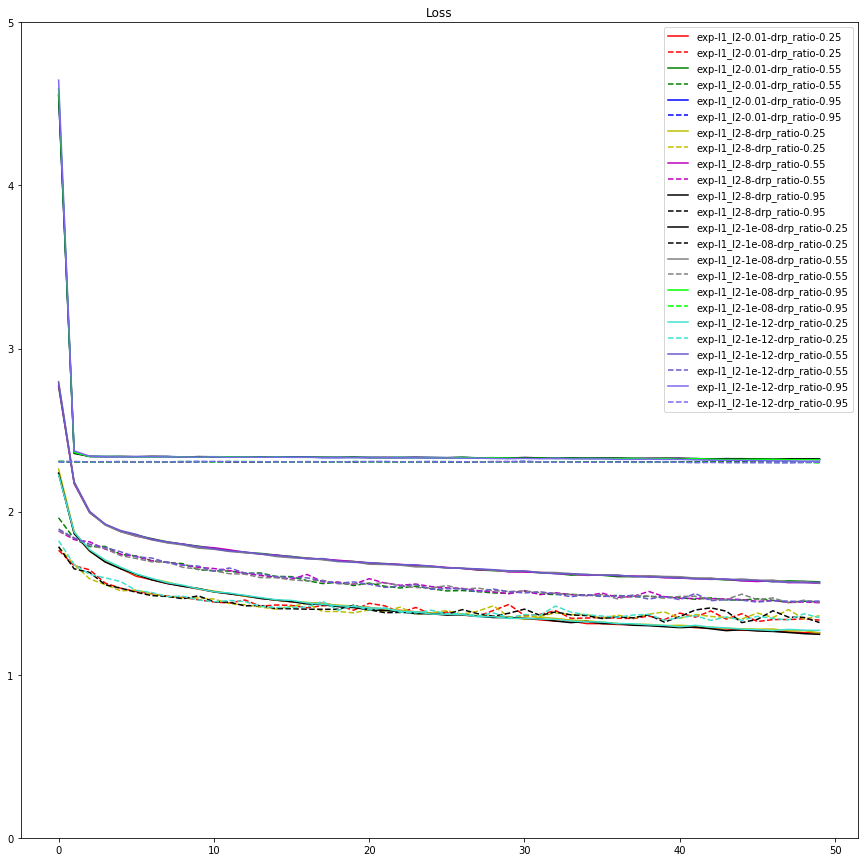

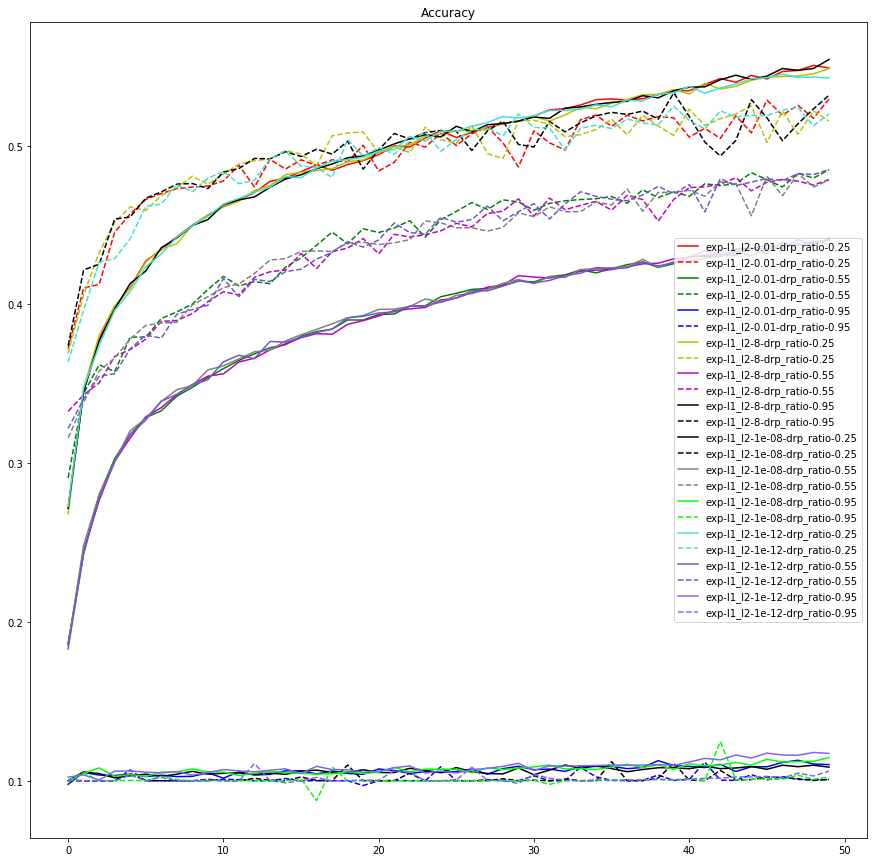

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k",'black','gray','lime','turquoise','slateblue','mediumslateblue','wheat','darkgoldenrod']
#color_bar = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']



plt.figure(figsize=(15, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.figure(figsize=(15,15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()